#### Bayesian Linear Regression with Metropolis Hastings

This notebook does linear regression with metropolis hastings from scratch to understand what is going on. We do not use any programing packages to get the parameters of the linear model. We however, will have to see how to get the posterior predictions for this model. As per Gelfand, it is fine to go with the found betas and error variance for the new observations. We follow the article at https://medium.com/@tinonucera/bayesian-linear-regression-from-scratch-a-metropolis-hastings-implementation-63526857f191. For simplicity, we are just considering a single predictor model with unknown error variance to understand what goes under the hood. 

Let Y and X be a response and a predictor for the model, respectively. The linear regression modedl is given by 

$Y|X \sim N (aX + b, \sigma^2)$

Our task is inferring $a$, $b$, and $σ$.

In this case, let’s generate synthetic data for the regression, using parameters $a=3$, $b=20$ and $σ=5$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

In [2]:
# sample x
np.random.seed(2024)
x = np.random.rand(100)*30

In [3]:
x.shape

(100,)

In [4]:
# set parameters
a = 3
b = 20
sigma = 5

In [5]:
# obtain response and add noise
y = a*x+b
noise = np.random.randn(100)*sigma
y = y + noise

In [6]:
# create a matrix containing the predictor in the first column
# and the response in the second
data = np.vstack((x,y)).T

In [7]:
noise.reshape(-1,1).shape

(100, 1)

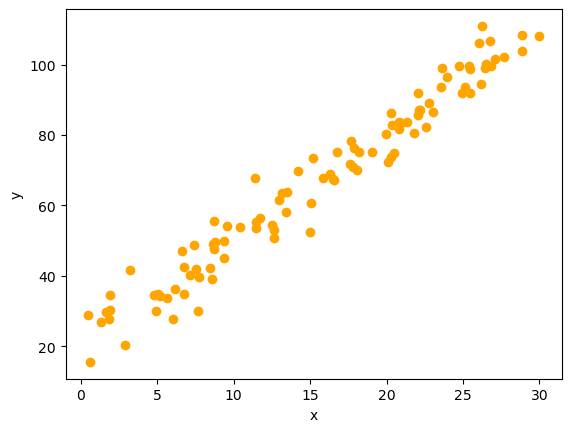

In [8]:
# plot data 
plt.scatter(data[:,0], data[:,1], color = 'orange')
plt.xlabel("x")
plt.ylabel("y")
plt.show()